In [8]:

# plot bar of Psych weights (summarised - averaged across psychiatric categories)
import scipy.io
import numpy as np

datapath = '/home/leah/Git/StomachBrain-MentalHealth/results/CCAloadings/' 

# Load the .mat file
mat = scipy.io.loadmat(f'{datapath}psychloadings_PsychScoresSubscales_CCA1.mat')

# Extract the data
data = mat['weightY'].T  

# subscale names
subscale_names = ['Autism', 'ADHD.A', 'ADHD.B', 'Empathy.Fantasy', 'Empathy.Concern', 'Empathy.Perspective', 'Empathy.Distress', 'Insomnia', 'Intero.Notice', 'Intero.Not.Distract', 'Intero.Not.Worry', 'Intero.Attention.Regulation', 'Intero.Emotion.Aware', 'Intero.Self.Regulate', 'Intero.Body.Listen', 'Intero.Trusting' , 'Depression.B', 'Physical.Fatigue', 'General.Fatigue', 'Reduced.Active', 'Reduced.Motivation', 'Mental.Fatigue', 'Support.Sig.Other', 'Support.Family', 'Support.Friend', 'Depression.A', 'Somatic.Symptoms', 'Stress', 'Social.Anxiety', 'Anxiety.Trait', 'Well-Being', 'Ment.Well-Being', 'Quality.Life.General', 'Quality.Life.Physical', 'Quality.Life.Psychological', 'Quality.Life.Social', 'Quality.Life.Environment']

# # Sort data & subscale_names 
# sorted_indices = np.argsort(data[0])
# data = data[:, sorted_indices]
# subscale_names = [subscale_names[i] for i in sorted_indices]
# # Save the top brain loading regions to a text file
# np.savetxt(f'/home/leah/Git/StomachBrain/StomachBrainCCA/figures/gastricPLV_PsychScoresSubscales/CCAPLS_toolkit/psychloadings37_CCA1.txt', np.column_stack((subscale_names, np.round(data.flatten(), 3))), fmt='%s')

# Create summary scores across psychiatric categories
factors_summary = [
    ['Autism'],
    ['ADHD.A', 'ADHD.B'],
    ['Empathy.Fantasy', 'Empathy.Concern', 'Empathy.Perspective', 'Empathy.Distress'],
    ['Insomnia'],
    ['Intero.Notice', 'Intero.Not.Distract', 'Intero.Not.Worry', 'Intero.Attention.Regulation', 'Intero.Emotion.Aware', 'Intero.Self.Regulate', 'Intero.Body.Listen', 'Intero.Trusting'],
    ['Depression.B', 'Depression.A'],
    ['Physical.Fatigue', 'General.Fatigue', 'Reduced.Active', 'Reduced.Motivation', 'Mental.Fatigue'],
    ['Support.Sig.Other', 'Support.Family', 'Support.Friend'],
    ['Somatic.Symptoms'],
    ['Stress'],
    ['Social.Anxiety', 'Anxiety.Trait'],
    ['Well-Being', 'Ment.Well-Being'],
    ['Quality.Life.General', 'Quality.Life.Physical', 'Quality.Life.Psychological', 'Quality.Life.Social', 'Quality.Life.Environment']
]

# Calculating summary scores
data_summary = []
for factor_list in factors_summary:
    if len(factor_list) > 1:
        factor_mean = np.mean(data[:, [subscale_names.index(factor) for factor in factor_list]], axis=1)
    else:
        factor_mean = data[:, subscale_names.index(factor_list[0])]
    data_summary.append(factor_mean)

# Transpose and assign factor names
data_summary = np.array(data_summary).T
factor_summary = ['Autism', 'ADHD', 'Empathy', 'Insomnia', 'Interoception', 'Depression', 'Fatigue', 'Social.Support', 'Somatic.Symps', 'Stress', 'Anxiety', 'Well-Being', 'Quality.of.Life']


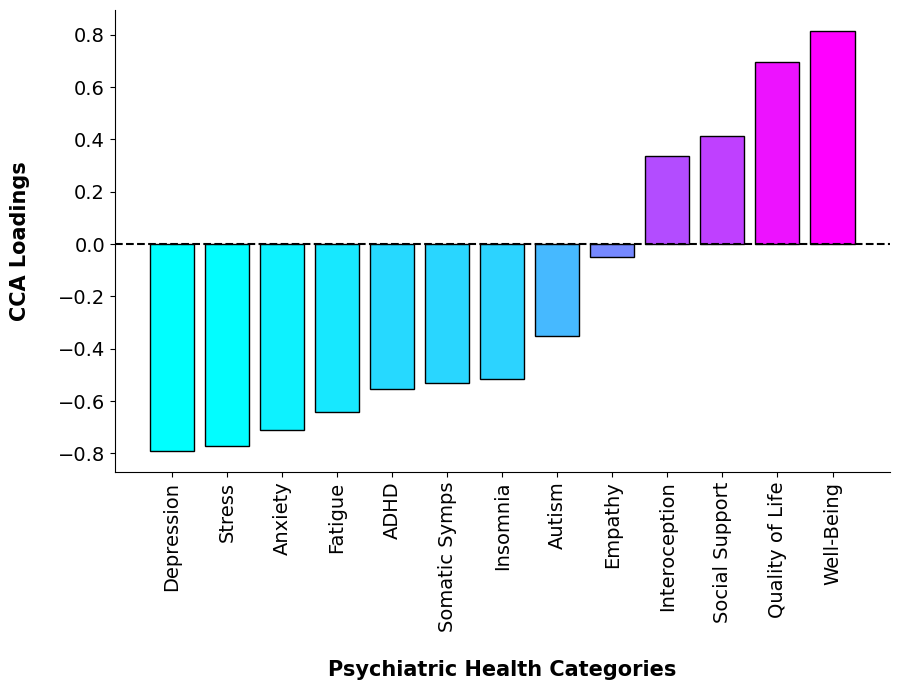

In [9]:
# plot psych averaged summary as barplot
import matplotlib.pyplot as plt

factor_summary = ['Autism', 'ADHD', 'Empathy', 'Insomnia', 'Interoception', 'Depression', 'Fatigue', 'Social Support', 'Somatic Symps', 'Stress', 'Anxiety', 'Well-Being', 'Quality of Life']

# Sort data_summary and factor_summary based on the first row (or first set of values)
sorted_indices = np.argsort(data_summary[0])
data_summary = data_summary[:, sorted_indices]
factor_summary = [factor_summary[i] for i in sorted_indices]

# Define the colors
colors = plt.cm.cool((data_summary[0] - min(data_summary[0])) / (max(data_summary[0]) - min(data_summary[0])))

# Adjust figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
plt.bar(range(len(data_summary[0])), data_summary[0], color=colors, edgecolor='black')

# Set x-axis labels 
plt.xticks(range(len(factor_summary)), factor_summary, rotation=90, fontsize=14) 
plt.yticks(fontsize=14)  

plt.axhline(0, color='black', linestyle='--')  # Add a dotted line at y=0

# Adding labels and title
plt.xlabel('Psychiatric Health Categories', fontsize=15, fontweight='bold', labelpad=20)
plt.ylabel('CCA Loadings', fontsize=15, fontweight='bold', labelpad=20)

plt.gca().spines['top'].set_visible(False)  # Remove top border
plt.gca().spines['right'].set_visible(False)  # Remove right border

#plt.savefig('f{datapath}bar_CCAloadings_psych_summary.png', bbox_inches='tight', transparent=True)  # Save as PNG without the whitespace
plt.show()


In [11]:
print(np.round(data_summary[0], 3))
print(factor_summary)

[-0.791 -0.773 -0.709 -0.642 -0.552 -0.533 -0.514 -0.351 -0.048  0.338
  0.413  0.696  0.815]
['Depression', 'Stress', 'Anxiety', 'Fatigue', 'ADHD', 'Somatic Symps', 'Insomnia', 'Autism', 'Empathy', 'Interoception', 'Social Support', 'Quality of Life', 'Well-Being']


In [4]:
# plot bar of Stomach-Brain Coupling loadings (summarised - averaged across subscales)
import scipy.io
import numpy as np
import numpy as np
from nilearn import datasets
import numpy as np
import matplotlib.pyplot as plt


datapath = '/home/leah/Git/StomachBrain-MentalHealth/results/CCAloadings/'


# Load the .mat file
mat = scipy.io.loadmat(f'{datapath}stomachbrainloadings_PsychScoresSubscales_CCA1.mat')
                       #brainloadings.mat') #'/home/leah/Git/StomachBrain/StomachBrainCCA/scripts/python/CCAdata2plot/CCAPLS_toolkit/loadings/stomachbrainloadings_PsychScoresSubscales_CCA1.mat') # /raw_weights/stomachbrainweights_PsychScoresSubscales_CCA1.mat'

# Extract the data
data = mat['weightX'].T  

# load difumo & coordinates
difumo = datasets.fetch_atlas_difumo(dimension=256, resolution_mm=3)
# White matter, venticle and CSF regions which were removed
difumo_dimensions_rejremoved = 209
idx2rem = [3, 5, 7, 11, 18, 19, 34, 44, 52, 55, 60, 71, 82, 85, 92, 93, 98, 101, 103, 111, 114, 123, 131, 132, 135, 136, 139, 140, 150, 153, 157, 165, 169, 175, 180, 182, 198, 202, 207, 231, 245, 246, 247, 249, 250, 253, 254]
idx2rem = [x - 1 for x in idx2rem] # minus 1 from indices for python (idx2rem values from matlab)
# remove from labels & coordinates too
difumo_labels_rejremoved = np.delete(difumo['labels'], idx2rem)

# Calculate unique labels and their indices
unique_labels = np.unique(difumo_labels_rejremoved["yeo_networks7"])

# Create an empty array to store the averaged data for each unique label
averaged_data = np.zeros(len(unique_labels))

# Iterate through unique labels and calculate the average for each group
for idx, label in enumerate(unique_labels):
    label_indices = np.where(difumo_labels_rejremoved["yeo_networks7"] == label)
    data_for_label = data[0, label_indices]
    averaged_data[idx] = np.mean(data_for_label, axis=1)
    
# Replacing 'No network found' with 'No Network' 
unique_labels[unique_labels == 'No network found'] = 'No Network'


/opt/anaconda3/lib/python3.8/site-packages/nilearn/datasets/atlas.py:131: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


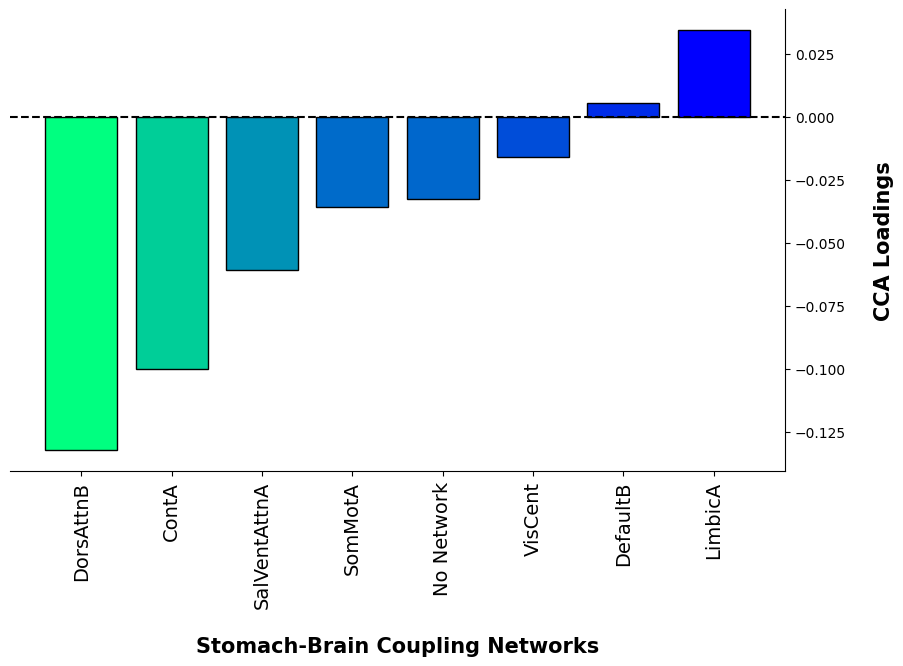

In [5]:
# plot averaged yeo network stomachbrain loadings as barplot

# Sort the data and colors
sorted_indices = np.argsort(averaged_data)#[::-1]
averaged_data = np.array(averaged_data)[sorted_indices]
unique_labels = [unique_labels[i] for i in sorted_indices]

# Define the colors
colors = plt.cm.winter_r((averaged_data - min(averaged_data)) / (max(averaged_data) - min(averaged_data)))

# Adjust figure size if needed
plt.figure(figsize=(10, 6))

# Create the bar plot
plt.bar(range(len(averaged_data)), averaged_data, color=colors, edgecolor='black')

# Set x-axis labels (if needed)
plt.xticks(range(len(unique_labels)), unique_labels, rotation=90, fontsize=14) 
plt.yticks(fontsize=14) 

plt.axhline(0, color='black', linestyle='--') 

# Adding labels and title
plt.xlabel('Stomach-Brain Coupling Networks', fontsize=15, labelpad=20, fontweight='bold',) # 
plt.ylabel('CCA Loadings', fontsize=15, labelpad=20, fontweight='bold') # 

plt.gca().spines['top'].set_visible(False)  # Remove top border
plt.gca().spines['left'].set_visible(False)  # Remove right border

plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()

#plt.savefig(f'{datapath}bar_CCAloadings_stomachbrain_networks.png', bbox_inches='tight', transparent=True)  # Save as PNG without the whitespace
plt.show()

In [7]:
print(np.round(averaged_data, 3))
print(unique_labels)

[-0.132 -0.1   -0.061 -0.036 -0.033 -0.016  0.006  0.034]
['DorsAttnB', 'ContA', 'SalVentAttnA', 'SomMotA', 'No Network', 'VisCent', 'DefaultB', 'LimbicA']


/opt/anaconda3/lib/python3.8/site-packages/nilearn/datasets/atlas.py:131: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/tmp/ipykernel_1778750/240593068.py:45: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  weight_image = weighted_mask.get_data()
/tmp/ipykernel_1778750/240593068.py:47: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version:

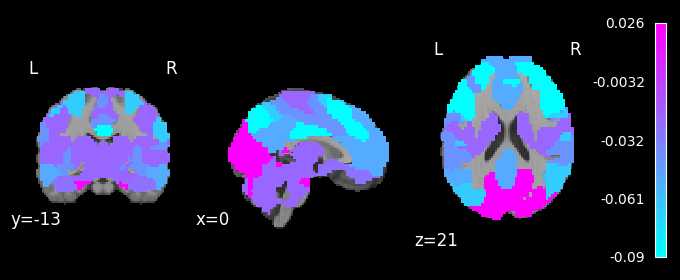

In [10]:
## Brain Plot of network loadings projected onto yeo networks (network loading averages above)

# make 'No Network' label back to 'No network found' 
unique_labels = np.unique(difumo_labels_rejremoved["yeo_networks7"])
unique_labels = [unique_labels[i] for i in sorted_indices]

import matplotlib.pyplot as plt
import numpy as np
from nilearn import datasets
from nilearn import plotting
from nilearn.image import index_img
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from nilearn import image as nimg
import os
import nibabel as nib

savepath =  '/home/leah/Git/Psychiatric_StomachBrain/figures/CCA/control_psychoutliersin/' #/home/leah/Git/StomachBrain/StomachBrainCCA/figures/gastricPLV_PsychScoresSubscales/'

# load difumo & coordinates
difumo = datasets.fetch_atlas_difumo(dimension=256, resolution_mm=3)
coordinates = plotting.find_probabilistic_atlas_cut_coords(maps_img=difumo.maps)

# White matter, venticle and CSF regions which were removed
difumo_dimensions_rejremoved = 209
idx2rem = [3, 5, 7, 11, 18, 19, 34, 44, 52, 55, 60, 71, 82, 85, 92, 93, 98, 101, 103, 111, 114, 123, 131, 132, 135, 136, 139, 140, 150, 153, 157, 165, 169, 175, 180, 182, 198, 202, 207, 231, 245, 246, 247, 249, 250, 253, 254]
idx2rem = [x - 1 for x in idx2rem] # minus 1 from indices for python (idx2rem values from matlab)
# remove from labels & coordinates too
difumo_labels_rejremoved =np.delete(difumo['labels'], idx2rem)
coordinates = np.delete(coordinates, idx2rem, axis = 0)

# ################### brain plot - by yeo networks ##############################################    
# don't sum over overlapping regions: (as difumo is probablistic)
weight_image = None
for count, difumo_parcel in enumerate(difumo_labels_rejremoved['difumo_names']):
    real_nodes_idx = np.where(difumo['labels']['difumo_names'] == difumo_parcel)
    for count2, node in enumerate(real_nodes_idx[0]):   
        parcel_img = index_img(difumo.maps, node)
        binarymask = nimg.math_img('a > 0', a=parcel_img)
        yeo_network = difumo['labels']['yeo_networks7'][node]
        this_weight = averaged_data[np.array(unique_labels) == yeo_network]
        weighted_mask = nimg.math_img(f'{this_weight}*a', a=binarymask)
        if weight_image is None:
            weight_image = weighted_mask.get_data()
        else:
            weighted_mask_data = weighted_mask.get_data()
            weight_image = np.where(np.abs(weighted_mask_data) > np.abs(weight_image), weighted_mask_data, weight_image)
            #weight_image = np.where(np.abs(weighted_mask_data) < np.abs(weight_image), weighted_mask_data, weight_image)
            
# Convert the resulting NumPy array back to a Nifti image
weight_image = nimg.new_img_like(weighted_mask, weight_image)

display = plotting.plot_anat(datasets.load_mni152_template(), draw_cross=False)
display.add_overlay(weight_image, colorbar=True, cmap='cool')

plt.savefig(f'{savepath}Brain_CCA1_yeo_averaged_loadings_multimask.png')
# save as nifti for plotting with MRIcroGL
nib.save(weight_image, f'{savepath}/CCA1_yeo_averaged_loadings_multimask.nii.gz')


In [20]:
# save separate yeo network nifti's (with averaged cca loading for each region) 
import nibabel as nib
import numpy as np

savepath =  '/home/leah/Git/StomachBrain/StomachBrainCCA/figures/gastricPLV_PsychScoresSubscales/'

img = nib.load(f'{savepath}/CCA1_yeo_averaged_loadings_multimask.nii.gz')
data = img.get_fdata()

for network in unique_labels:
    # Create a binary mask for the selected network value
    selected_mask = np.where(data == round(averaged_data[np.array(unique_labels) == network][0], 8), 1, 0)

    # Apply the mask to the original data
    selected_data = data * selected_mask

    # Create a new Nifti image with the selected network data
    selected_img = nib.Nifti1Image(selected_data, img.affine)

    # Save the new Nifti image to a new file
    output_path = f'{savepath}CCA1_yeo_averaged_loadings_{network}.nii.gz'
    nib.save(selected_img, output_path)